<a href="https://colab.research.google.com/github/antra0497/Interview_Assignment_FandP/blob/main/fandp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Loading Json files

In [189]:
#loading json in pandas dataframe
df_indoor = pd.read_json('/content/drive/MyDrive/Colab Notebooks/fandp/iaq.json')
df_outdoor = pd.read_json('/content/drive/MyDrive/Colab Notebooks/fandp/oaq.json')
df_floor = pd.read_json('/content/drive/MyDrive/Colab Notebooks/fandp/floors.json')

In [190]:
print(f"Size of Indoor dataframe is:{df_indoor.shape}")
print(f"Size of Outdoor dataframe is:{df_outdoor.shape}")
print(f"Size of Floor dataframe is:{df_floor.shape}")

Size of Indoor dataframe is:(102629, 5)
Size of Outdoor dataframe is:(2892, 4)
Size of Floor dataframe is:(2, 3)


In [191]:
df_indoor.head(5)

,documentTime,temp,humidity,co2,sensor_id
0,2023-01-23T00:03:37.000Z,23.5,22,788,ENKZYW001792
1,2023-01-23T00:00:48.000Z,23.6,23,778,ENKZYW001804
2,2023-01-23T00:04:53.000Z,22.0,25,785,ENKZYW001882
3,2023-01-23T00:01:33.000Z,23.2,47,449,ENKZYW001856
4,2023-01-23T00:04:29.000Z,22.8,23,780,ENKZYW001848


In [192]:
df_outdoor.head(5)

,documentTime,temperature,humidity,windSpeed
0,2023-01-23T01:00:00+00:00,-1.3,89.5,NaN
1,2023-01-23T02:00:00+00:00,-1.5,90.0,NaN
2,2023-01-23T03:00:00+00:00,-1.8,90.0,NaN
3,2023-01-23T04:00:00+00:00,-2.2,90.7,NaN
4,2023-01-23T05:00:00+00:00,-2.3,91.0,NaN


In [193]:
df_floor

,id,image,sensors
0,H-3F,"{'name': 'H-3F.png', 'width': 1000, 'height': ...","[{'sensor_id': 'ENKZYW001792', 'location': {'y..."
1,H-4F,"{'name': 'H-4F.png', 'width': 1000, 'height': ...","[{'sensor_id': 'ENKZYW001883', 'location': {'y..."


Since floor data is in nested json format. 
We will normalise it to relevant format

In [194]:
# initialising new dataframe for normalized sensor location data
floor_sensor = pd.DataFrame()
# initialising new dataframe for normalized floor meta data
floor_meta=  pd.DataFrame()

for i in range(len(df_floor)):
  s_temp = pd.json_normalize(df_floor['sensors'][i], max_level=2)
  s_temp['id'] = df_floor['id'][i]

  m_temp= pd.json_normalize(df_floor['image'][i]).drop(columns=['name'])
  m_temp['id']= df_floor['id'][i]

  floor_sensor = floor_sensor.append(s_temp).reset_index(drop=True) 
  floor_meta = floor_meta.append(m_temp).reset_index(drop=True) 

In [195]:
floor_sensor.head(5)

,sensor_id,location.y,location.x,id
0,ENKZYW001792,487.47,355.19,H-3F
1,ENKZYW001804,313.77,203.47,H-3F
2,ENKZYW001819,153.54,387.91,H-3F
3,ENKZYW001837,134.67,609.73,H-3F
4,ENKZYW001848,156.61,891.23,H-3F


In [196]:
floor_meta

,width,height,id
0,1000,646,H-3F
1,1000,646,H-4F


### Data Exploration

#### Datetime conversion

In [197]:
# cheching the data type
df_indoor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102629 entries, 0 to 102628
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   documentTime  102629 non-null  object 
 1   temp          102629 non-null  float64
 2   humidity      102629 non-null  int64  
 3   co2           102629 non-null  int64  
 4   sensor_id     102629 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 3.9+ MB


In [198]:
# changing 'documentTime' from object to datetime dtype
df_indoor['datetime']= pd.to_datetime(df_indoor['documentTime'])
# create separate date and time feature
df_indoor['date'] = df_indoor['datetime'].apply(lambda x : x.date())
df_indoor['time'] = df_indoor['datetime'].apply(lambda x : x.time())
df_indoor= df_indoor.drop(columns=['documentTime'])

In [199]:
df_indoor.head(5)

,temp,humidity,co2,sensor_id,datetime,date,time
0,23.5,22,788,ENKZYW001792,2023-01-23 00:03:37+00:00,2023-01-23,00:03:37
1,23.6,23,778,ENKZYW001804,2023-01-23 00:00:48+00:00,2023-01-23,00:00:48
2,22.0,25,785,ENKZYW001882,2023-01-23 00:04:53+00:00,2023-01-23,00:04:53
3,23.2,47,449,ENKZYW001856,2023-01-23 00:01:33+00:00,2023-01-23,00:01:33
4,22.8,23,780,ENKZYW001848,2023-01-23 00:04:29+00:00,2023-01-23,00:04:29


In [200]:
# cheching the data type
df_outdoor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2892 entries, 0 to 2891
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   documentTime  2892 non-null   object 
 1   temperature   2892 non-null   float64
 2   humidity      2892 non-null   float64
 3   windSpeed     1814 non-null   float64
dtypes: float64(3), object(1)
memory usage: 90.5+ KB


In [201]:
# changing 'documentTime' from object to datetime dtype
df_outdoor['datetime']= pd.to_datetime(df_outdoor['documentTime'])
# create seperate date and time feature
df_outdoor['date'] = df_outdoor['datetime'].apply(lambda x : x.date())
df_outdoor['time'] = df_outdoor['datetime'].apply(lambda x : x.time())
df_outdoor= df_outdoor.drop(columns=['documentTime'])

In [202]:
df_outdoor.head(5)

,temperature,humidity,windSpeed,datetime,date,time
0,-1.3,89.5,NaN,2023-01-23 01:00:00+00:00,2023-01-23,01:00:00
1,-1.5,90.0,NaN,2023-01-23 02:00:00+00:00,2023-01-23,02:00:00
2,-1.8,90.0,NaN,2023-01-23 03:00:00+00:00,2023-01-23,03:00:00
3,-2.2,90.7,NaN,2023-01-23 04:00:00+00:00,2023-01-23,04:00:00
4,-2.3,91.0,NaN,2023-01-23 05:00:00+00:00,2023-01-23,05:00:00


#### Missing Value:

In [203]:
# Check for missing values
print('IAQ Data Missing Values:\n', df_indoor.isna().sum())

print('\n OAQ Data Missing Values:\n', df_outdoor.isna().sum())

IAQ Data Missing Values:
 temp         0
humidity     0
co2          0
sensor_id    0
datetime     0
date         0
time         0
dtype: int64

 OAQ Data Missing Values:
 temperature       0
humidity          0
windSpeed      1078
datetime          0
date              0
time              0
dtype: int64


In [204]:
# Fill NAN with zero
df_outdoor['windSpeed'] = df_outdoor['windSpeed'].fillna(0)

#### Check Inconsistency:

In [205]:
# Check for inconsistencies between IAQ and floor dataframes
iaq_sensors = set(df_indoor['sensor_id'])
floor_sensors = set(floor_sensor['sensor_id'])

if iaq_sensors == floor_sensors:
    print('No inconsistencies found between IAQ and floor dataframes')
else:
    print('Inconsistencies found between IAQ and floor dataframes')

No inconsistencies found between IAQ and floor dataframes


In [206]:
# Group by sensor_id and calculate time difference between consecutive records
grouped = df_indoor.groupby('sensor_id')

for sensor_id, group in grouped:
    time_diff = group['datetime'].diff()
    #to check if the data is comming every 5 min
    if all(time_diff == pd.Timedelta(minutes=5)):
        print(f'Data for sensor ID {sensor_id} is coming every 5 minutes')
    else:
        print(f'Data for sensor ID {sensor_id} is not coming every 5 minutes')

Data for sensor ID ENKZYW001792 is not coming every 5 minutes
Data for sensor ID ENKZYW001804 is not coming every 5 minutes
Data for sensor ID ENKZYW001819 is not coming every 5 minutes
Data for sensor ID ENKZYW001837 is not coming every 5 minutes
Data for sensor ID ENKZYW001848 is not coming every 5 minutes
Data for sensor ID ENKZYW001856 is not coming every 5 minutes
Data for sensor ID ENKZYW001882 is not coming every 5 minutes
Data for sensor ID ENKZYW001883 is not coming every 5 minutes
Data for sensor ID ENKZYW001884 is not coming every 5 minutes
Data for sensor ID ENKZYW001888 is not coming every 5 minutes
Data for sensor ID ENKZYW001900 is not coming every 5 minutes
Data for sensor ID ENKZYW001925 is not coming every 5 minutes
Data for sensor ID ENKZYW001935 is not coming every 5 minutes
Data for sensor ID ENKZYW001958 is not coming every 5 minutes


In [207]:
# Group by sensor_id and calculate time difference between consecutive records
grouped = df_indoor.groupby('sensor_id')

for sensor_id, group in grouped:
    # to get the time difference at which the data is comming
    time_diff = group['datetime'].diff().dropna()
    avg_time_diff = time_diff.mean()
    print(f'Average time difference for sensor ID {sensor_id}: {avg_time_diff}')

Average time difference for sensor ID ENKZYW001792: 0 days 00:05:05.231419558
Average time difference for sensor ID ENKZYW001804: 0 days 00:05:33.916206515
Average time difference for sensor ID ENKZYW001819: 0 days 00:05:05.163386323
Average time difference for sensor ID ENKZYW001837: 0 days 00:05:06.599949296
Average time difference for sensor ID ENKZYW001848: 0 days 00:05:05.027868852
Average time difference for sensor ID ENKZYW001856: 0 days 00:08:05.830688893
Average time difference for sensor ID ENKZYW001882: 0 days 00:05:11.426161967
Average time difference for sensor ID ENKZYW001883: 0 days 00:05:04.772458107
Average time difference for sensor ID ENKZYW001884: 0 days 00:05:04.830119722
Average time difference for sensor ID ENKZYW001888: 0 days 00:05:05.656640970
Average time difference for sensor ID ENKZYW001900: 0 days 00:05:04.933946804
Average time difference for sensor ID ENKZYW001925: 0 days 00:05:11.399588053
Average time difference for sensor ID ENKZYW001935: 0 days 00:05

❌ So the data is not exactly at 5 minutes differece but we can approximate it to 5 minute

In [208]:
# Calculate the time difference between consecutive rows
df_outdoor['time_diff'] = df_outdoor['datetime'] - df_outdoor['datetime'].shift(1)

# Calculate the average time difference
avg_time_diff = df_outdoor['time_diff'].mean()

# Print the result
print("The average time difference between consecutive rows in df_outdoor is:", avg_time_diff)
df_outdoor= df_outdoor.drop(columns=['time_diff'])

The average time difference between consecutive rows in df_outdoor is: 0 days 00:13:55.558630231


### Data Wrangling: 


#### Calculating Humidity Ratio:

In [175]:
import math

# Define the saturation vapor pressure function
def sat_vapor_pressure(temp):
    return 611.2 * math.exp((17.67 * temp) / (temp + 243.5))

# Define the function to calculate the humidity ratio
def humidity_ratio(temp, humidity):
    sat_pressure = sat_vapor_pressure(temp)
    partial_pressure = sat_pressure * humidity / 100
    return 0.62198 * partial_pressure / (101325 - partial_pressure)

# Calculate the humidity ratio for each row in the indoor data
df_indoor['humidity_ratio'] = df_indoor.apply(lambda x: humidity_ratio(x['temp'], x['humidity']), axis=1)

#### Rollup Data: Daily and Hourly

In [176]:
# Set datetime column as index
df_indoor_ = df_indoor.set_index('datetime')

# Resample data by day and sensor_id and calculate the mean values
df_indoor_daily = df_indoor_.groupby('sensor_id').resample('D').mean()
# Resample data by hour and sensor_id and calculate the mean values
df_indoor_hour = df_indoor_.groupby('sensor_id').resample('H').mean()

# Reset the index to include sensor_id and datetime columns
df_indoor_daily = df_indoor_daily.reset_index()
df_indoor_hour = df_indoor_hour.reset_index()

# Print the result
print(df_indoor_daily.head(5))
print(df_indoor_hour.head(5))

      sensor_id                  datetime       temp   humidity         co2  \
0  ENKZYW001792 2023-01-23 00:00:00+00:00  23.673050  22.673759  846.897163   
1  ENKZYW001792 2023-01-24 00:00:00+00:00  24.208865  23.950355  584.262411   
2  ENKZYW001792 2023-01-25 00:00:00+00:00  24.293262  25.088652  670.851064   
3  ENKZYW001792 2023-01-26 00:00:00+00:00  24.694306  27.644128  588.911032   
4  ENKZYW001792 2023-01-27 00:00:00+00:00  24.641958  25.678322  552.496503   

   humidity_ratio  
0        0.004107  
1        0.004475  
2        0.004719  
3        0.005328  
4        0.004926  
      sensor_id                  datetime       temp   humidity         co2  \
0  ENKZYW001792 2023-01-23 00:00:00+00:00  23.491667  22.000000  794.083333   
1  ENKZYW001792 2023-01-23 01:00:00+00:00  23.409091  21.181818  790.272727   
2  ENKZYW001792 2023-01-23 02:00:00+00:00  23.266667  21.000000  782.500000   
3  ENKZYW001792 2023-01-23 03:00:00+00:00  23.200000  21.000000  775.500000   
4  ENKZYW0

In [167]:
# Set datetime column as index
df_outdoor_ = df_outdoor.set_index('datetime')

# Resample data by day and calculate the mean values
df_outdoor_daily = df_outdoor_.resample('D').mean()
# Resample data by day and calculate the mean values
df_outdoor_hour = df_outdoor_.resample('H').mean()

# Reset the index to include datetime column
df_outdoor_daily = df_outdoor_daily.reset_index()
df_outdoor_hour = df_outdoor_hour.reset_index()

# Print the result
print(df_outdoor_daily.head(5))
print(df_outdoor_hour.head(5))

                   datetime  temperature   humidity  windSpeed
0 2023-01-23 00:00:00+00:00     0.647826  86.843478        0.0
1 2023-01-24 00:00:00+00:00     3.231250  83.246875        0.0
2 2023-01-25 00:00:00+00:00     2.467742  91.000000        0.0
3 2023-01-26 00:00:00+00:00     4.643478  87.382609        0.0
4 2023-01-27 00:00:00+00:00     4.484906  83.373585        0.0
                   datetime  temperature  humidity  windSpeed
0 2023-01-23 01:00:00+00:00         -1.3      89.5        0.0
1 2023-01-23 02:00:00+00:00         -1.5      90.0        0.0
2 2023-01-23 03:00:00+00:00         -1.8      90.0        0.0
3 2023-01-23 04:00:00+00:00         -2.2      90.7        0.0
4 2023-01-23 05:00:00+00:00         -2.3      91.0        0.0


#### Merge Hourly Data

In [224]:
# Merge the floor sensor and indoor data on sensor_id
df_merged = pd.merge(floor_sensor, df_indoor_hour, on='sensor_id')
# Merge the merged dataframe with floor meta data
df_merged = pd.merge(df_merged, floor_meta, on='id')
# Merge the merged dataframe with outdoor data on datetime
df_merged = pd.merge(df_merged, df_outdoor_hour, on='datetime', how='left')

In [225]:
df_merged.head(5)

,sensor_id,location.y,location.x,id,datetime,temp,humidity_x,co2,humidity_ratio,width,height,temperature,humidity_y,windSpeed
0,ENKZYW001792,487.47,355.19,H-3F,2023-01-23 00:00:00+00:00,23.491667,22.000000,794.083333,0.003932,1000,646,NaN,NaN,NaN
1,ENKZYW001792,487.47,355.19,H-3F,2023-01-23 01:00:00+00:00,23.409091,21.181818,790.272727,0.003766,1000,646,-1.3,89.5,0.0
2,ENKZYW001792,487.47,355.19,H-3F,2023-01-23 02:00:00+00:00,23.266667,21.000000,782.500000,0.003701,1000,646,-1.5,90.0,0.0
3,ENKZYW001792,487.47,355.19,H-3F,2023-01-23 03:00:00+00:00,23.200000,21.000000,775.500000,0.003686,1000,646,-1.8,90.0,0.0
4,ENKZYW001792,487.47,355.19,H-3F,2023-01-23 04:00:00+00:00,23.136364,20.909091,756.000000,0.003656,1000,646,-2.2,90.7,0.0


In [226]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9036 entries, 0 to 9035
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   sensor_id       9036 non-null   object             
 1   location.y      9036 non-null   float64            
 2   location.x      9036 non-null   float64            
 3   id              9036 non-null   object             
 4   datetime        9036 non-null   datetime64[ns, UTC]
 5   temp            8684 non-null   float64            
 6   humidity_x      8684 non-null   float64            
 7   co2             8684 non-null   float64            
 8   humidity_ratio  8684 non-null   float64            
 9   width           9036 non-null   int64              
 10  height          9036 non-null   int64              
 11  temperature     8444 non-null   float64            
 12  humidity_y      8444 non-null   float64            
 13  windSpeed       8444 non-null   f

In [227]:
df_merged= df_merged.rename(columns={"id": "floor_id", 
                          "temp": "temp_in", 
                          "humidity_x": "humidity_in", 
                          "co2": "co2_in", 
                          "temperature": "temp_out",
                          "humidity_y": "humidity_out",
                          "windSpeed": "windSpeed_out"})

#### Stats Check:

The required operational values are:


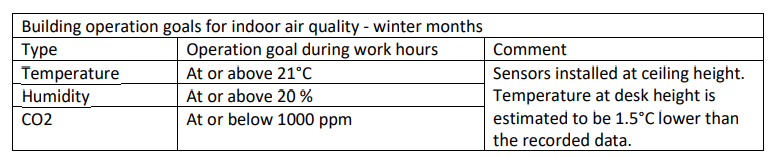

In [209]:
# Check range of values
df_indoor.describe()

,temp,humidity,co2
count,102629.000000,102629.000000,102629.000000
mean,23.518861,31.273412,565.377155
std,1.151765,5.090771,150.045277
min,13.000000,20.000000,411.000000
25%,22.900000,28.000000,446.000000
50%,23.700000,30.000000,508.000000
75%,24.300000,34.000000,652.000000
max,27.200000,62.000000,1378.000000


In [210]:
# Check values for min and max
print('IAQ Data Value Ranges:')
df_indoor.agg(['min', 'max'])

IAQ Data Value Ranges:


,temp,humidity,co2,sensor_id,datetime,date,time
min,13.0,20,411,ENKZYW001792,2023-01-23 00:00:16+00:00,2023-01-23,00:00:00
max,27.2,62,1378,ENKZYW001958,2023-02-19 23:59:36+00:00,2023-02-19,23:59:59


In [218]:
print(f"There are {len(df_indoor[df_indoor['temp']< 21])} datapoint which do not meet Temperature requirement")
print(f"There are {len(df_indoor[df_indoor['co2']>1000])} datapoint which do not meet CO2 requirement")

There are 2170 datapoint which do not meet Temperature requirement
There are 1267 datapoint which do not meet CO2 requirement


📓Note:

1.   There are few data point where temperature falls below the required operational standard, minimum being at 13 degree
2.   There are some data point where CO2 level exceeded the optimal levels with max at 1378 ppm



In [222]:
# Check range of values
df_outdoor.describe()

,temperature,humidity,windSpeed
count,2892.000000,2892.000000,2892.000000
mean,8.109336,82.011929,1.048029
std,2.944377,6.163737,1.331072
min,-2.700000,50.000000,0.000000
25%,6.200000,79.000000,0.000000
50%,8.300000,83.000000,0.700000
75%,10.500000,86.700000,1.200000
max,13.800000,93.000000,8.100000


### Visualization:


#### 1.   Sensor Location Analysis :



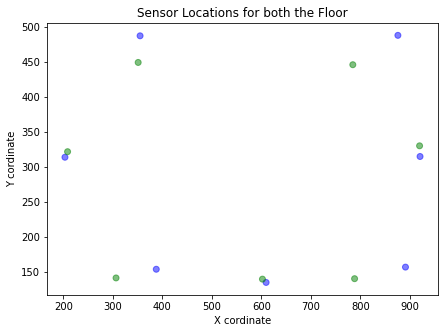

In [223]:
from matplotlib import colormaps
# Plotting sensors on the floor plan
fig, ax = plt.subplots(figsize=(7,5))
#Blue color for 3rd floor and Green color for 4th floor
colors = {'H-3F':'blue', 'H-4F':'green'}

ax.scatter(x=floor_sensor['location.x'], 
           y=floor_sensor['location.y'], 
           alpha=0.5, 
           c= floor_sensor['id'].map(colors)
           )
ax.set_xlabel('X cordinate')
ax.set_ylabel('Y cordinate')
ax.set_title('Sensor Locations for both the Floor')
plt.show()

#### 2. Correlation plot:

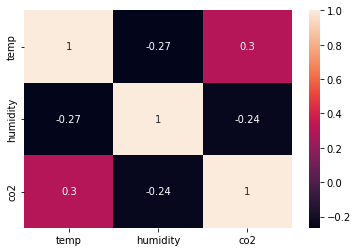

In [83]:
# Plot the correlation matrix for temperature, humidity, and CO2 levels
sns.heatmap(df_indoor[['temp', 'humidity', 'co2']].corr(), annot=True)
plt.show()

#### 3. Timeseries Plot: Temperature per Sensor

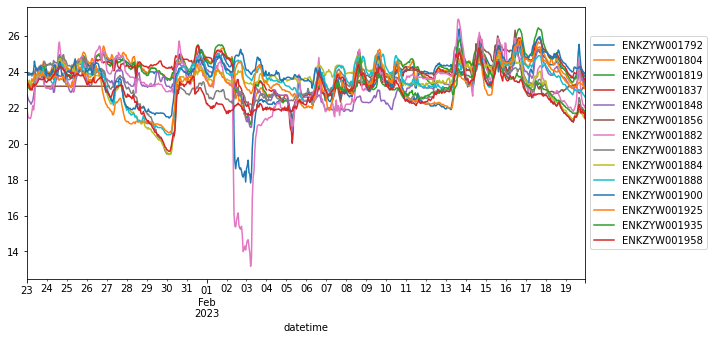

In [88]:
# Resample the data to hourly frequency and compute the average temperature
hourly_temps = df_indoor.set_index('datetime').groupby('sensor_id')['temp'].resample('H').mean()
fig, ax = plt.subplots(figsize=(10,5))
# Plot the hourly temperature time-series for each sensor
for sensor_id in hourly_temps.index.levels[0]:
    hourly_temps.loc[sensor_id].plot(label=sensor_id)
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

####4. BarPlot: CO2 Levels

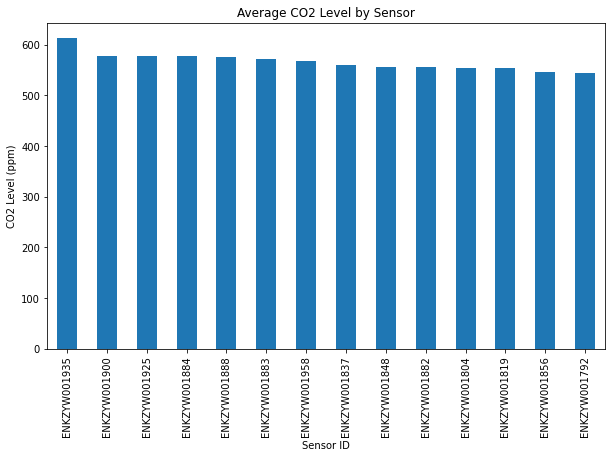

In [96]:
# Grouping data by sensor_id to get average CO2 readings
co2_by_sensor = df_indoor.groupby('sensor_id')['co2'].mean()

# Sorting data in descending order of average CO2 readings
co2_by_sensor.sort_values(ascending=False, inplace=True)

# Plotting average CO2 readings for each sensor
co2_by_sensor.plot(kind='bar', figsize=(10, 6))
plt.title('Average CO2 Level by Sensor')
plt.xlabel('Sensor ID')
plt.ylabel('CO2 Level (ppm)')
plt.show()

#### 5. Overall correlation analysis: Hourly Merged Data

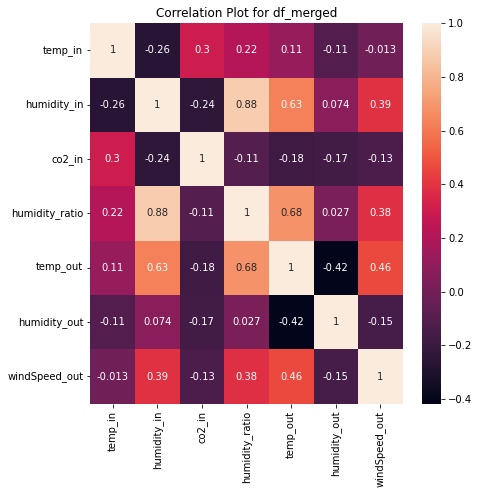

In [231]:
corr_matrix = df_merged.drop(columns=["width", "height", "location.y", "location.x"]).corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corr_matrix, annot=True)
# Set title
ax.set_title('Correlation Plot for df_merged')
# Show plot
plt.show()

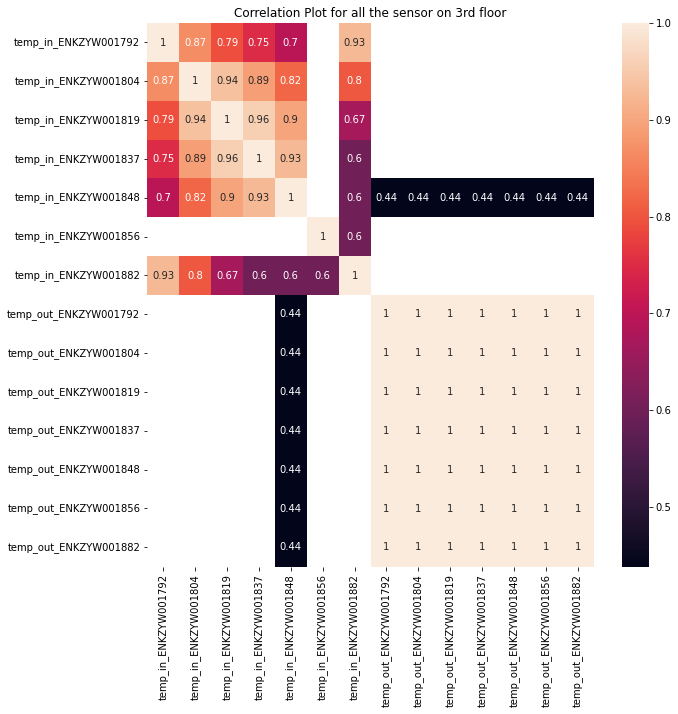

In [229]:
# Create a subset of df_merged with only sensor_id, datetime, temp_in, and temp_out columns
temp_data = df_merged[df_merged.floor_id == 'H-3F'][['sensor_id', 'floor_id', 'datetime', 'temp_in', 'temp_out']]

# Pivot the temp_data to create separate columns for temp_x and temp_y for each sensor and date
temp_data = temp_data.pivot_table(index=['datetime'], columns=['sensor_id'], values=['temp_in', 'temp_out'])

# Flatten the column multi-index
temp_data.columns = ['_'.join(col).strip() for col in temp_data.columns.values]

# Create a correlation matrix
corr_matrix = temp_data.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix[corr_matrix >= 0.4], annot=True)
# Set title
ax.set_title('Correlation Plot for all the sensor on 3rd floor')
# Show plot
plt.show()

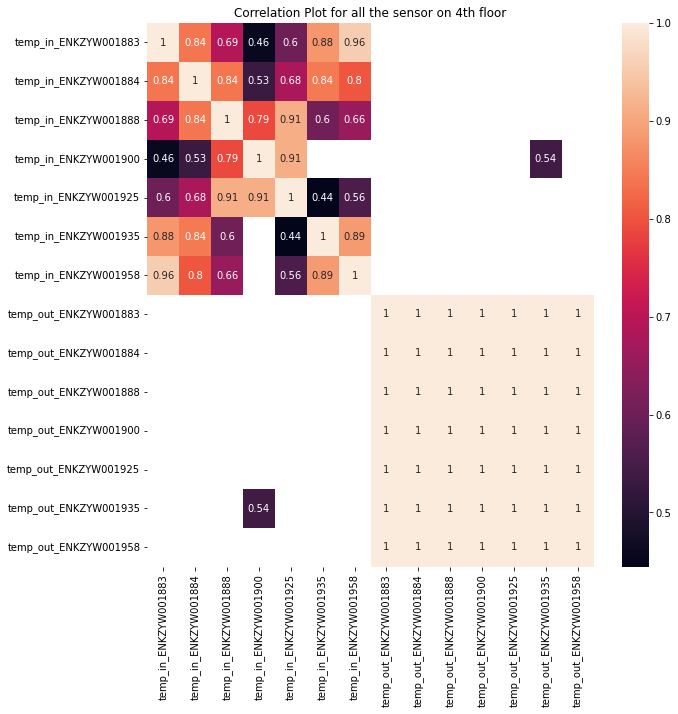

In [230]:
# Create a subset of df_merged with only sensor_id, datetime, temp_in, and temp_out columns
temp_data = df_merged[df_merged.floor_id == 'H-4F'][['sensor_id', 'floor_id', 'datetime', 'temp_in', 'temp_out']]

# Pivot the temp_data to create separate columns for temp_x and temp_y for each sensor and date
temp_data = temp_data.pivot_table(index=['datetime'], columns=['sensor_id'], values=['temp_in', 'temp_out'])

# Flatten the column multi-index
temp_data.columns = ['_'.join(col).strip() for col in temp_data.columns.values]

# Create a correlation matrix
corr_matrix = temp_data.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix[corr_matrix >= 0.4], annot=True)
# Set title
ax.set_title('Correlation Plot for all the sensor on 4th floor')
# Show plot
plt.show()

### Saving processed data as .csv

In [ ]:
floor_sensor.to_csv('/content/drive/MyDrive/Colab Notebooks/fandp/clean_data/floor_sensor.csv')
floor_meta.to_csv('/content/drive/MyDrive/Colab Notebooks/fandp/clean_data/floor_meta.csv')
df_indoor.to_csv('/content/drive/MyDrive/Colab Notebooks/fandp/clean_data/df_indoor.csv')
df_outdoor.to_csv('/content/drive/MyDrive/Colab Notebooks/fandp/clean_data/df_outdoor.csv')

In [177]:
df_indoor_hour.to_csv('/content/drive/MyDrive/Colab Notebooks/fandp/clean_data/df_indoor_hour.csv')
df_indoor_daily.to_csv('/content/drive/MyDrive/Colab Notebooks/fandp/clean_data/df_indoor_daily.csv')
df_outdoor_hour.to_csv('/content/drive/MyDrive/Colab Notebooks/fandp/clean_data/df_outdoor_hour.csv')
df_outdoor_daily.to_csv('/content/drive/MyDrive/Colab Notebooks/fandp/clean_data/df_outdoor_daily.csv')